# Least squares Fit

A couple of examples to show how to use:  
- numpy.polyfit  



In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

## Fit a polynomial
We start by fitting a polynomial to a given data set (a parabola). Compare a linear fit and a parabolic fit and check the goodness of fits.

In [2]:
# Create some data distribuited as parabola with noise (normally distributed errors).

def parabola(x, a, b, c):
    return a*x**2 + b*x + c
def error(x, sigma):
    return norm.rvs(0.0, sigma, x.size) 

# parabola's parameters
a = -0.1
b = 0
c = 1
sigma_y = 0.005 

# the points on the x-axis
x = np.linspace(0, 1, 51) #51 to have points at 0.0 and 1.0
print(x)

# generate the data
y_true = parabola(x, a, b, c)

# add the noise
delta_y = error(x, sigma_y) 
y = y_true + delta_y
y_error = sigma_y * np.ones(x.size)
print(y)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
[0.98548098 0.99752519 1.0017913  1.00027711 1.00030276 0.99710203
 0.99678924 0.99742363 1.00052794 0.98873975 1.00158866 0.9949598
 0.99731542 0.99210625 0.9900523  0.98296144 0.9884051  0.99017416
 0.99130175 0.98274526 0.98051341 0.98678898 0.98587282 0.99022773
 0.97243217 0.97806708 0.97493948 0.97051971 0.97020392 0.97232551
 0.96158309 0.96457575 0.95973117 0.95331503 0.96107087 0.95851369
 0.95073656 0.94054743 0.94976237 0.94757994 0.93539882 0.92902464
 0.93347937 0.92811715 0.92542277 0.92045739 0.91158974 0.91055158
 0.91424383 0.91147033 0.89600651]


In [3]:
def fit_polynomial(x, y, degree, weight):
    """Fit polynomial of degree to data x, y with y weight = 1/sigma_y
    Return fit parameters' best estimate, covariance matrix, 
    residuals, chi-squared and degrees of freedom.
    """
    
    fit, cov = np.polyfit(x, y, degree, w=weight, cov=True)
   
    chisq = np.sum((y - np.polyval(fit, x))**2 / y_error**2)

    dof = x.shape[0] - degree
    chisqndof = chisq / (dof)
    
    return fit, cov, chisq, chisqndof, dof
    
# Fit straight line
fit_1, cov_1, chisq_1, chisqndof_1, dof_1 = fit_polynomial(x, y, 1, 1/y_error) 

# Fit parabola
fit, cov, chisq, chisqndof, dof = fit_polynomial(x, y, 2, 1/y_error) 

In [4]:
# Get the fitted parameters and their uncertainties (use some reasonable number of significant digits)

print ("Fit with a straight line")
errPars_1 = np.sqrt(np.diag(cov_1))
print ('a = {:.4f}'.format(fit_1[0]), ' +/- {:.4f}'.format(errPars_1[0]))
print ('b = {:.4f}'.format(fit_1[1]), ' +/- {:.4f}'.format(errPars_1[1]))

print ("Fit with a parabola")
errPars = np.sqrt(np.diag(cov))
print ('a = {:.4f}'.format(fit[0]), ' +/- {:.4f}'.format(errPars[0]))
print ('b = {:.4f}'.format(fit[1]), ' +/- {:.4f}'.format(errPars[1]))
print ('c = {:.4f}'.format(fit[2]), ' +/- {:.4f}'.format(errPars[2]))

Fit with a straight line
a = -0.0953  +/- 0.0048
b = 1.0148  +/- 0.0028
Fit with a parabola
a = -0.1132  +/- 0.0082
b = 0.0179  +/- 0.0085
c = 0.9963  +/- 0.0018


Compare the fitted parameters with the true ones you defined at the beginning

Parabola: mu = 0.0000 ; sigma = 1.9624
Parabola: mu = 0.0000 ; sigma = 0.8809


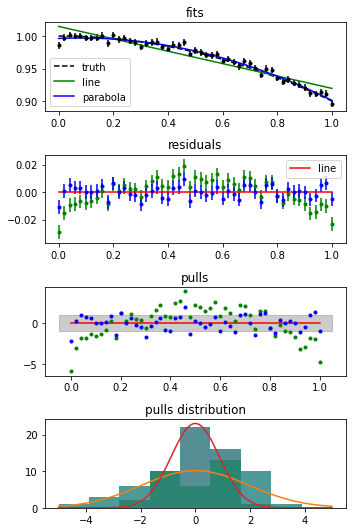

In [5]:
# plot the data, the truth (the parabola used to generate the data), the fit to a straight line fit, and the fit to a parabola
f, ax = plt.subplots(4,1, figsize=(5, 7.5))
ax[0].set_title('fits')
ax[0].errorbar(x, y, yerr=y_error, fmt='k.')
ax[0].plot(x, y_true, 'k--',label='truth') # true parabola
ax[0].plot(x, np.polyval(fit_1, x), label='line', color='green')
ax[0].plot(x, np.polyval(fit, x), label='parabola', color='blue')
ax[0].legend()

# plot of the residuals
ax[1].errorbar(x,y - np.polyval(fit_1, x), yerr=y_error, fmt='.', color='green')
ax[1].errorbar(x,y - np.polyval(fit, x), yerr=y_error, fmt='.', color='blue')
ax[1].set_title('residuals')
ax[1].plot(x,np.polyval([0,0], x), label='line', color='red')

# plot of the pulls
pulls_1 = (y - np.polyval(fit_1, x))/y_error
pulls   = (y - np.polyval(fit, x))/y_error
ax[2].errorbar(x,pulls_1, yerr=y_error, fmt='.', color='green')
ax[2].errorbar(x,pulls, yerr=y_error, fmt='.', color='blue')
ax[2].set_title('pulls')
band = np.ones(x.size) #draw a grey band showing sigma = 1
ax[2].fill_between(ax[1].get_xlim(), -1, 1, color='grey', alpha=0.4, label=r'$1\sigma$')
ax[2].plot(x,np.polyval([0,0], x), label='line', color='red')

# plot the pulls distribution
bins = np.linspace(-5, 5, 10)
ax[3].set_title('pulls distribution')
ax[3].hist(pulls_1, bins , color='green', alpha = 0.5)
ax[3].hist(pulls,   bins , color='blue' , alpha = 0.5)

# fit the pull distributions with a gaussian
import scipy
h1, bins_1, _ = plt.hist(pulls_1, bins, range = (-5,5), alpha=0.5)
mu_1, sigma_1 = scipy.stats.norm.fit(pulls_1)
print ("Parabola: mu = {:1.4f} ; sigma = {:1.4f}".format(mu_1, sigma_1))
bins_1x = np.linspace(-5, 5, 100)
best_fit_line_1 = scipy.stats.norm.pdf(bins_1x, mu_1, sigma_1)
plt.plot(bins_1x, best_fit_line_1*np.sum(h1))

h, bins, _ = plt.hist(pulls, bins, range = (-5,5), alpha=0.5)
mu, sigma = scipy.stats.norm.fit(pulls)
print ("Parabola: mu = {:1.4f} ; sigma = {:1.4f}".format(mu, sigma))
bins_x = np.linspace(-5, 5, 100)
best_fit_line = scipy.stats.norm.pdf(bins_x, mu, sigma)
plt.plot(bins_x, best_fit_line*np.sum(h))


ax[1].legend()
f.tight_layout()

Why one pull distribution is larger than the other ? Why they are both symmetric ?

In [6]:
# compute the (reduced) chi2 
print ('Reduced chi^2, dof:')
print ('straight line: {:.4f}'.format(chisq_1), " ; dof=",dof_1)
print ('parabola: {:.4f}'     .format(chisq  ), " ; dof=",dof) 

Reduced chi^2, dof:
straight line: 196.4101  ; dof= 50
parabola: 39.5731  ; dof= 49


What can you say about the chi2/ndof ?

In [7]:
# p-value for the chi2
def evaluate_chisq(chisq, dof):
    return chi2.sf(chisq, dof)

In [8]:
print('Chi^2 p-values')
print ('straight line: chi2={:.4f}'.format(chisq_1),' ; dof=', dof_1, ' ; p-value={:.10f}'.format(evaluate_chisq(chisq_1, dof_1)))
print ('parabola:      chi2={:.4f}'.format(chisq)  ,' ; dof=', dof  , ' ; p-value={:.10f}'.format(evaluate_chisq(chisq, dof)))

Chi^2 p-values
straight line: chi2=196.4101  ; dof= 50  ; p-value=0.0000000000
parabola:      chi2=39.5731  ; dof= 49  ; p-value=0.8296291995


How does the p-value compares to the chi2/ndof ?

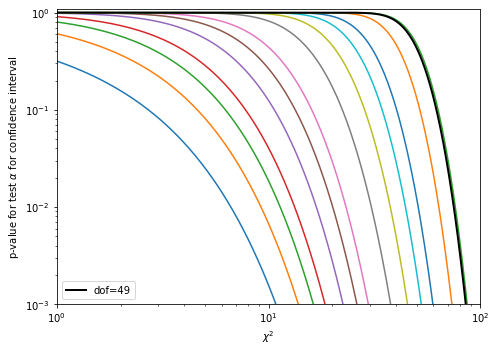

In [9]:
# Draw the plot form lecture notes 
plt.figure(figsize=(7, 5))
chisq_arr = np.linspace(0, 100, 1001)
plt.ylabel(r'p-value for test $\alpha$ for confidence interval') 
plt.xlabel(r'$\chi^2$')
for n in [1, 2, 3, 4, 6, 8, 10, 15, 20, 25, 30, 40, 50]:
    plt.loglog(chisq_arr, chi2.sf(chisq_arr, n))
plt.loglog(chisq_arr, chi2.sf(chisq_arr, dof), 'k-', lw=2, label='dof={0}'.format(dof))
plt.ylim(1e-3, 1.1)
plt.xlim(1, 100)

plt.legend()
plt.tight_layout()